In [1]:
import math
import fluids
from fluids.units import *


Given:  SAE 30 Oil at 100 degF is flowing through 5" Schedule 40 pipe at a rate of 400 gallons per minute.
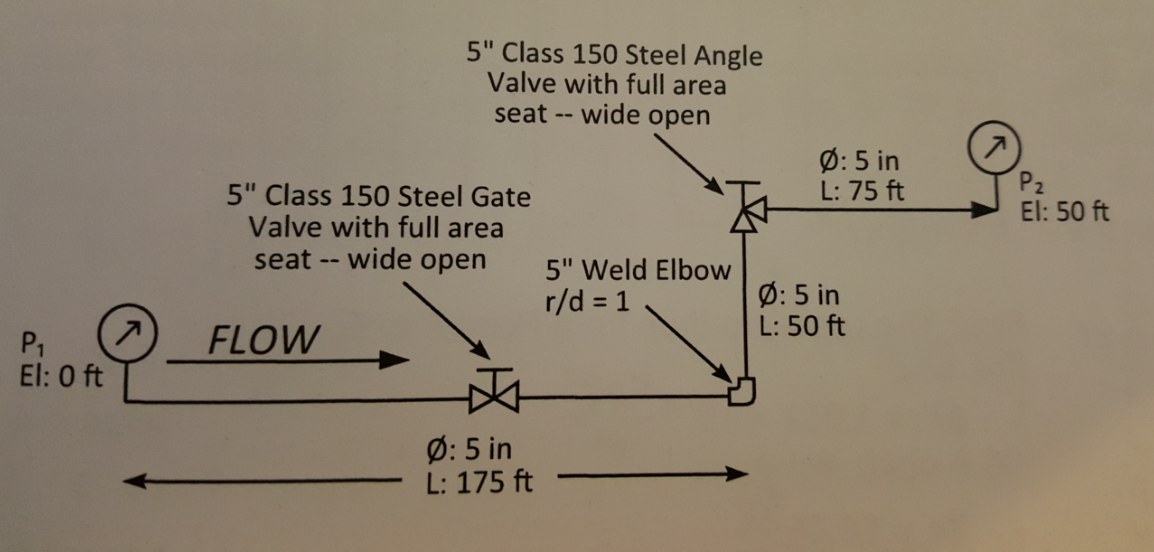
Find:  The velocity in feet per second and pressure difference between gauges P1 and P2

In [2]:
Q = 400*u.gallon/u.minute

d = nearest_pipe(NPS=5*u.inch, schedule='40')[1]
d = d.to(u.inch)

S = 0.887 #Crane 410, A-8, @ 60 degF
S = 0.87 #Crane 410, A-8, @ 100 degF, read along the curve

mu = 130*u.cP #Crane 410, A-3

rho = S*62.364*u.lb/u.feet**3 #specific density mult density of water

ft = 0.015 #Crane 410, A-27

Q, d.round(3), S, mu, rho.round(3), ft

(<Quantity(400.0, 'gallon / minute')>,
 <Quantity(5.047, 'inch')>,
 0.87,
 <Quantity(130, 'centipoise')>,
 <Quantity(54.257, 'pound / foot ** 3')>,
 0.015)

In [3]:
Re = (50.66*Q*rho/(d*mu)).magnitude
Re.round(3)

1675.64

Re<2000 therefore flow is laminar

In [4]:
f = 64/Re
f

0.03819436047224021

# K Values

In [5]:
#gate valve, Crane 410, A-28
K1_gate = 8*ft

#angle valve, Crane 410, A-28
K1_angle = 150*ft

#elbow, Crane 410, A-30
K = 20*ft

#pipe
L = (175+50+75)*u.feet
D = d.to(u.feet)
K_pipe = f*L/D

#Total K
K_tot = K1_gate + K1_angle + K + K_pipe
K_tot

<Quantity(29.912529809529218, 'dimensionless')>

In [6]:
v = (0.4085*Q/d**2).magnitude*u.feet/u.sec
v.round(2)

<Quantity(6.41, 'foot / second')>

In [7]:
#Change in pressure due to elevation
hL = 50*u.feet
delta_P_elevation = (hL*rho/(144)).magnitude

#Change in pressure due to flow
delta_P_pipe = ((1.801e-5)*(K_tot*rho*Q**2)/d**4).magnitude

#total delta_P
total_delta_P = delta_P_elevation + delta_P_pipe

total_delta_P.round(3)*u.psi

<Quantity(26.046, 'pound_force_per_square_inch')>